## Retrieving all References and Queries

In [1]:
import numpy as np
import librosa as lb # for reference, my solutions use librosa version 0.7.2
import matplotlib.pyplot as plt
from scipy.signal import stft
import glob
import os.path
import subprocess
import pickle
import IPython.display as ipd
import warnings
import scipy.signal

In [2]:
def retrieveMP3s(indir):
    """
    Helper function to retrieve a list of all the .mp3 files listed in the provided directory
    """
    
    pathname = indir + '\*.mp3'
    
    return glob.glob(pathname)

In [3]:
references = retrieveMP3s("References")
queries = retrieveMP3s("Queries")

In [23]:
def retrieveAnswer(pathname):
    """
    Helper function that takes in a .mp3 file whose name is a list of the digits spoken in the file and returns a 
    list of the characters
    
    Inputs:
    pathname - the pathname of the file of interest
    
    Outputs:
    answer - a list of the digits in the mp3's file name
    """
    basename = os.path.basename(pathname)[:-4]
    answer = [int(digit) for digit in list(basename)]
    
    return answer

In [28]:
print(queries[4])
print(retrieveAnswer(queries[4]))

Queries\0294.mp3
[0, 2, 9, 4]


Misc. testing below, function works as anticipated, ignore rest

In [27]:
print(references)
print()
print(len(queries))

['References\\Reference_1.mp3', 'References\\Reference_2.mp3', 'References\\Reference_3.mp3', 'References\\Reference_4.mp3', 'References\\Reference_5.mp3', 'References\\Reference_6.mp3', 'References\\Reference_7.mp3', 'References\\Reference_8.mp3', 'References\\Reference_9.mp3']

100


In [5]:
audio, sr = lb.core.load(queries[2], sr = 22050)

C:\Users\yeahb\Anaconda3\lib\site-packages\librosa\core\audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [6]:
ipd.Audio(audio, rate = sr)

## MFCC Algorithm

we begin by testing librosa's mfcc on the first reference

In [7]:
mfcc_test = lb.feature.mfcc(audio)

(20, 330)


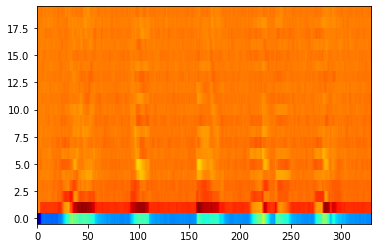

In [8]:
plt.imshow(mfcc_test, cmap = "jet", origin = "lower")
plt.axis("tight")
print(mfcc_test.shape)

Now we begin with our our implementation of the MFCC calculation

In [29]:
def binToHz(k, nfft = 2048, fs = 22050):
    """
    Helper function that takes in an fft/stft frequency bin k and returns the corresponding frequency of the bin in hertz
    
    Inputs:
    k - the index of the stft row of interest
    
    Outputs:
    freq - the frequency of the provided STFT bin
    """
    
    freq = k*fs/nfft
    
    return freq

In [ ]:
def hzToBin(freq, nfft = 2048, fs = 22050):
    """
    """
    
    k = freq*nfft/fs
    
    return k

In [ ]:
def hzToMel(hz):
    """
    """
    
    mel = 1125*np.log(1 + hz/700)
    
    return mel

In [ ]:
def melToHz(mel):
    """
    """
    hz = 700*(np.exp(mel/1125) - 1)
    
    return hz

In [ ]:
def calculateFilterMatrix(numFilters = 26, bottomFreq = 300, topFreq = 8000,  nfft = 2048):
    """
    Helper function for the MFCC calculation that returns a matrix of size numfilters x nfft//2 + 1
    """

In [9]:
def mfcc(S, n_fft = 2048, sr = 22050, num_coeffs = 12):
    """
    Performs the calculation of the MFCC feature matrix
    
    Inputs:
    
    Outputs:
    
    """
    #we begin by calculating the periodogram of the provided STFT matrix
    pxx= np.abs(S)**2/n_fft
    
    filterMatrix = #insert function here
    
    
    
    
    return pxx    

In [10]:
S = lb.core.stft(audio, n_fft = 2048, hop_length = 128)

In [11]:
pxx = mfcc(S)

(-0.5, 1318.5, -0.5, 249.5)

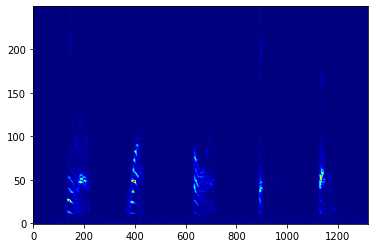

In [12]:
plt.imshow(np.abs(S)[0:250], cmap = "jet", origin = "lower")
plt.axis("tight")

(-0.5, 1318.5, -0.5, 249.5)

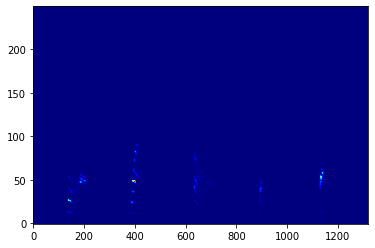

In [13]:
plt.imshow(pxx[0:250], cmap = "jet", origin = "lower")
plt.axis("tight")